# Paper Plots

In [2]:
import os
import glob
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.table import QTable
from astropy.wcs import WCS
from astroquery.vizier import Vizier
from astropy.io import fits

import matplotlib.pyplot as plt

## Load Data

In [3]:
imdir = "/rds/user/pmk46/hpc-work/19A-056/final"
qso_catalog = QTable.read('Quasar_catalog_Banados+16_Matsuoka+19a_Matsuoka+19b_Wang+18_Wang+19_Reed+19_Yang+20.txt', format='ascii')
z_list, M_list, ra_list, dec_list, authors = [], [], [], [], []
obsnames = []

for i, imfits in enumerate(glob.glob(os.path.join(imdir, "images/*.fits"))):
    obsname = list(imfits.split("/")[-1][:14])
    obsname[3] = "_"
    obsname = "".join(obsname)
    obsnames.append(obsname)

    image_data = fits.open(imfits)[0].data[0, 0]

for row in qso_catalog:
    if row["QSO-Name"] in obsnames:
        z_list.append(row["Redshift"])
        M_list.append(row["M_1450"])
        authors.append(row["Ref"])
        ra_list.append(row["RA"])
        dec_list.append(row["Dec"])

z_list = np.array(z_list)
M_list = np.array(M_list)
ra_list = np.array(ra_list)
dec_list = np.array(dec_list)
authors = np.array(authors)

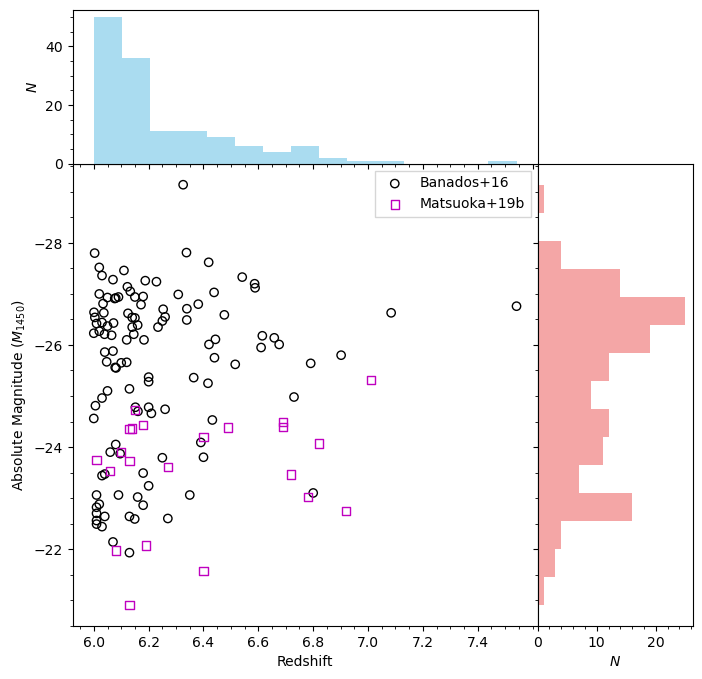

In [4]:
# Create figure and axes
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(4, 4)
ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_histx = fig.add_subplot(gs[0, 0:3])
ax_histy = fig.add_subplot(gs[1:4, 3])

# Scatter plot
ax_main.scatter(z_list[authors=="Banados+16"], M_list[authors=="Banados+16"], c="None", edgecolors="k", marker="o", label="Banados+16")
#ax_main.scatter(z_list[authors=="Matsuoka+19a"], M_list[authors=="Matsuoka+19a"], c="None", edgecolors="b", marker="o", label="Matsuoka+19a")
ax_main.scatter(z_list[authors=="Matsuoka+19b"], M_list[authors=="Matsuoka+19b"], c="None", edgecolors="m", marker="s", label="Matsuoka+19b")
#ax_main.scatter(z_list[authors=="Wang+18"], M_list[authors=="Wang+18"], c="None", edgecolors="r", label="Wang+18")
#ax_main.scatter(z_list[authors=="Wang+19"], M_list[authors=="Wang+19"], c="None", edgecolors="orange", label="Wang+19")
#ax_main.scatter(z_list[authors=="Reed+19"], M_list[authors=="Reed+19"], c="None", edgecolors="c", label="Reed+19")
#ax_main.scatter(z_list[authors=="Yang+20"], M_list[authors=="Yang+20"], c="None", edgecolors="g", label="Yang+20")
ax_main.invert_yaxis()
ax_main.legend(fancybox=False)

# Histogram along the x-axis
ax_histx.hist(z_list, bins=15, color='skyblue', alpha=0.7, orientation='vertical')
ax_histx.set_ylabel(r"$N$")
ax_histx.set_xticklabels([])

# Histogram along the y-axis
ax_histy.hist(M_list, bins=15, color='lightcoral', alpha=0.7, orientation='horizontal')
ax_histy.set_xlabel(r"$N$")
ax_histy.set_yticklabels([])
ax_histy.invert_yaxis()

# Set shared axis labels
ax_main.set_xlabel(r"Redshift")
ax_main.set_ylabel(r"Absolute Magnitude ($M_{1450}$)")

# Set tick labels for the main plot
ax_main.set_xticks(np.arange(6.0, 7.6, 0.2))  # Set x-tick locations
ax_main.set_yticks(np.arange(-28, -20, 2))  # Set y-tick locations

ax_main.minorticks_on()
ax_histx.minorticks_on()
ax_histy.minorticks_on()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()

plt.savefig("../../plots/M_vs_z.pdf")
# Show the plot
plt.show()


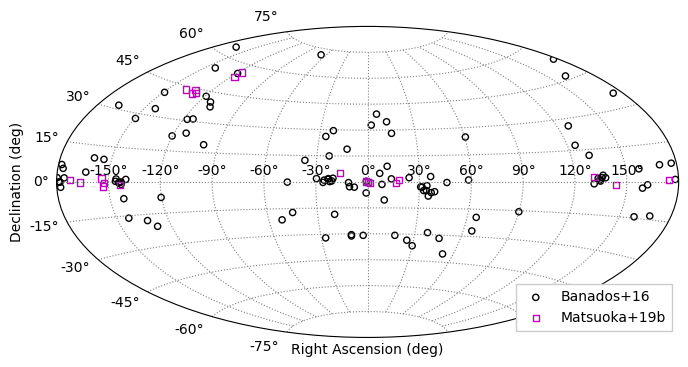

In [12]:
# Create a WCS object for the all-sky map
wcs = WCS(naxis=2)
wcs.wcs.equinox = 2000.0
wcs.wcs.crpix = [180.0, 90.0]
wcs.wcs.cdelt = np.array([-1.0, 1.0])
wcs.wcs.ctype = ["RA---CAR", "DEC--CAR"]

# Convert RA and Dec strings to numerical values (in degrees)
coords = SkyCoord(ra_list, dec_list, unit=(u.hourangle, u.deg))

# Extract the RA and Dec values in degrees
ra_deg = coords.ra.wrap_at(180 * u.deg).radian
dec_deg = coords.dec.radian

# Plotting
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter(ra_deg[authors=="Banados+16"], dec_deg[authors=="Banados+16"], color="None", edgecolor="k", alpha=1, marker="o", s=20, label="Banados+16")
ax.scatter(ra_deg[authors=="Matsuoka+19b"], dec_deg[authors=="Matsuoka+19b"], color="None", edgecolor="m", alpha=1, marker="s", s=20, label="Matsuoka+19b")
ax.grid(color='gray', linestyle='dotted')
ax.set_xlabel('Right Ascension (deg)')
ax.set_ylabel('Declination (deg)')
ax.legend(loc=4, framealpha=1, fancybox=False)

plt.tight_layout()
plt.savefig("../../plots/qso_sky_map.pdf")


plt.show()
